## Import modules

In [1]:
import pytesseract as pst
import PIL.Image as pi
import cv2
from pytesseract import Output
from wand.image import Image as wii
from pdf2image import convert_from_path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import string
import IPython.display as Ipd
from glob import glob as gg
from tqdm import tqdm

# Data preporition

                           done                                          result            to do
 ___________________________/\________________________________      _______/\_______      ___/\___
/                                                             \    /                \    /        \
PDF -> PNG -> text -> (removing_stopwords, removing_puntuation) -> statistical result -> withing ML
            ^       
       PyTesseract

### Converting PDF to PNG

In [2]:
# POPPLER_PATH = r"C:\Users\Elara\Downloads\Release-23.01.0-0\poppler-23.01.0\Library\bin"
# SAVING_FOLDER = "./png/"
# PDF_FILES = gg('./pdf/*.pdf')

# i = 1
# for file in PDF_FILES:
#     pages = convert_from_path(pdf_path = file, poppler_path = POPPLER_PATH)

#     j = 1
#     for page in pages:
#         img_name = f"Doc-{i}_Img-{j}.png"
#         page.save(os.path.join(SAVING_FOLDER, img_name), "PNG")
#         j += 1
#     i += 1

### Returning text from image

In [3]:
# Text recognition configuration
MY_CONFIG = r"--psm 3 --oem 3 -l eng" # --psm 3, 6 
PNG_FILES = gg('./png/*.png')

# Files that we use
test_files_ix = [2, 7, 9]

In [4]:
def doc_ix(file):
    return int(str(file)[10])

def img_ix(file):
    if str(file)[17] == '.':
        return int(str(file)[16])
    else:
        return int(str(file)[16:18])

In [73]:
text_list_doc1 = []
text_list_doc2 = []
text_list_doc3 = []

train_text1 = []
train_text2 = []
train_text3 = []
train_text4 = []
train_text5 = []
train_text6 = []

In [74]:
for file in PNG_FILES:
    if (doc_ix(file) in test_files_ix):
        test_text = pst.image_to_string(pi.open(file), config = MY_CONFIG)
        if doc_ix(file) == test_files_ix[0] and img_ix(file) >= 4:
            text_list_doc1 += test_text.split()
        elif doc_ix(file) == test_files_ix[1] and img_ix(file) >= 20:
            text_list_doc2 += test_text.split()
        elif doc_ix(file) == test_files_ix[2] and (img_ix(file) >= 6 and img_ix(file) <= 14):
            text_list_doc3 += test_text.split()
    else:
        train_text = pst.image_to_string(pi.open(file), config = MY_CONFIG)
        if doc_ix(file) == 1 and img_ix(file) <= 18:
            train_text1 += train_text.split()
        elif doc_ix(file) == 3:
            train_text2 += train_text.split()
        elif doc_ix(file) == 4 and (img_ix(file) == 6 or img_ix(file) == 7 or (img_ix(file) >= 12 and img_ix(file) <= 14) or img_ix(file) >= 23):
            train_text3 += train_text.split()
        elif doc_ix(file) == 5 and img_ix(file) >= 6:
            train_text4 += train_text.split()
        elif doc_ix(file) == 6:
            train_text5 += train_text.split()
        elif doc_ix(file) == 8 and img_ix(file) >= 9:
            train_text6 += train_text.split()

In [7]:
to_remove = ['IEEE', 'International', 'Conference', 'Communication', 'technologies', 'Almaty', 'Oct', 'Kazakhstan']
text_list_doc1 = [item for item in text_list_doc1 if item not in to_remove]

In [8]:
origin_text_elements = len(text_list_doc1) + len(text_list_doc2) + len(text_list_doc3)
origin_text_elements

9979

In [9]:
origin_train_elements = len(train_text1) + len(train_text2) + len(train_text3) + len(train_text4) + len(train_text5) + len(train_text6)
origin_train_elements

30825

## Fuctions

### Drop Punctuation and Save words in Uppercase

In [10]:
lowercases1 = []
lowercases2 = []
lowercases3 = []

uppercases1 = []
uppercases2 = []
uppercases3 = []

names1 = []
names2 = []
names3 = []

In [11]:
def drop_punctuation(text_list):
    lowercases = []
    uppercases = []
    names = []

    for word in list(text_list):
        str_word = str(word).translate(str.maketrans('', '', string.punctuation))
        
        if str_word.isupper() and len(str_word) > 1:
            uppercases.append(str_word)

        elif str_word.islower() and len(str_word) > 1:
            lowercases.append(str_word)
        
        elif len(str_word) > 1 and ord(str_word[0]) <= 90 and ord(str_word[1]) >= 97:
            names.append(str_word)
        
    for word_str in names:
        if word_str.lower() in lowercases:
            names.remove(word_str)
    
    for word_str in uppercases:
        if word_str.lower() in lowercases:
            uppercases.remove(word_str)
    
    doc = lowercases + uppercases + names
    
    return doc, lowercases, uppercases, names

In [12]:
text_list_doc1, lowercases1, uppercases1, names1 = drop_punctuation(text_list_doc1)
text_list_doc2, lowercases2, uppercases2, names2 = drop_punctuation(text_list_doc2)
text_list_doc3, lowercases3, uppercases3, names3 = drop_punctuation(text_list_doc3)

In [75]:
train_text1, train_lowers1, train_uppers1, train_names1  = drop_punctuation(train_text1)
train_text2, train_lowers2, train_uppers2, train_names2  = drop_punctuation(train_text2)
train_text3, train_lowers3, train_uppers3, train_names3  = drop_punctuation(train_text3)
train_text4, train_lowers4, train_uppers4, train_names4  = drop_punctuation(train_text4)
train_text5, train_lowers5, train_uppers5, train_names5  = drop_punctuation(train_text5)
train_text6, train_lowers6, train_uppers6, train_names6  = drop_punctuation(train_text6)

### Drop non word

In [14]:
stop_words = ['the', 'of', 'and', 'in', 'to', 'for', 'is',
              'as', 'with', 'on', 'are', 'this', 'that', 'it', 
              'by', 'an', 'be', 'was', 'has', 'such', 'from',
              'he', 'all', 'use', 'new', 'its', 'which', 'their',
              'can', 'at', 'where', 'when', 'not', 'if', 'there',
              'or', 'you', 'they', 'each', 'have', 'them', 'these',
              'out', 'then', 'etc', 'time', 'also', 'we', 'thus',
              'about', 'should', 'lets', 'will']

In [15]:
def drop_non_word(text_list):
    new_list = []

    for word in list(text_list):
        if word.isalpha() and word.lower() not in stop_words and len(word) > 1:
            new_list.append(word)
            
    return new_list

In [16]:
text_list_doc1 = drop_non_word(text_list_doc1)
text_list_doc2 = drop_non_word(text_list_doc2)
text_list_doc3 = drop_non_word(text_list_doc3)

In [76]:
train_text1 = drop_non_word(train_text1)
train_text2 = drop_non_word(train_text2)
train_text3 = drop_non_word(train_text3)
train_text4 = drop_non_word(train_text4)
train_text5 = drop_non_word(train_text5)
train_text6 = drop_non_word(train_text6)

### Drop duplicates

In [18]:
def drop_duplicates(any_list):
    without_dpt = [*set(any_list)]
    without_dpt.sort()
    return without_dpt

In [19]:
without_dpt_doc1 = drop_duplicates(text_list_doc1)
without_dpt_doc2 = drop_duplicates(text_list_doc2)
without_dpt_doc3 = drop_duplicates(text_list_doc3)

In [20]:
len(without_dpt_doc1) + len(without_dpt_doc2) + len(without_dpt_doc3)

2699

In [21]:
def word_counts(any_list, filename):
    df = pd.DataFrame(any_list)
    df.to_csv(filename, encoding='utf-8')

In [22]:
def word_unique(any_list, filename):
    df = pd.DataFrame(any_list, columns=['word'])
    df.to_csv(filename, encoding='utf-8')

In [23]:
word_counts(text_list_doc1, './csv/count_of_words_doc1')

word_counts(text_list_doc2, './csv/count_of_words_doc2')

word_counts(text_list_doc3, './csv/count_of_words_doc3')

In [24]:
all_text = text_list_doc1 + text_list_doc2 + text_list_doc3
without_dpt_all = without_dpt_doc1 + without_dpt_doc2 + without_dpt_doc3

without_dpt_all = drop_duplicates(all_text)

word_counts(all_text, './csv/count_of_all_words')

In [25]:
len(without_dpt_all)

2103

In [26]:
def to_unique(this_list, list1, list2):
    new_list = []

    for word in list(this_list):
        if word not in list1 and word not in list2:
            new_list.append(word)
    
    return new_list

In [27]:
unique_doc1 = to_unique(without_dpt_doc1, without_dpt_doc2, without_dpt_doc3)
unique_doc2 = to_unique(without_dpt_doc2, without_dpt_doc1, without_dpt_doc3)
unique_doc3 = to_unique(without_dpt_doc3, without_dpt_doc2, without_dpt_doc1)

In [28]:
word_unique(unique_doc1, './csv/unique_of_words_doc1')

word_unique(unique_doc2, './csv/unique_of_words_doc2')

word_unique(unique_doc3, './csv/unique_of_words_doc3')

In [29]:
def conjunction(list1, list2, list3):
    new_list = []
    
    for word in list(list1):
        if word in list2 and word in list3:
            new_list.append(word)

    return new_list

In [30]:
conj_of_all = conjunction(without_dpt_doc1, without_dpt_doc2, without_dpt_doc3)

In [31]:
word_unique(conj_of_all, './csv/conj')

In [32]:
def uniq_word_counts(x):
    return all_text.count(x)

In [33]:
def combine_lists(list1, list2):
    return list(map(list, zip(list1, list2)))

In [34]:
def check_count(any_list, type):
    count_list = map(uniq_word_counts, any_list)
    count_list = list(count_list)
    count_list = combine_lists(any_list, count_list)
    count_list.sort(key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(count_list, columns=['word', 'count'])
    df['type'] = type
    return df

In [35]:
conj_df = check_count(conj_of_all, 'IT')
uniq_doc1_df = check_count(unique_doc1, 'edu')
uniq_doc2_df = check_count(unique_doc2, 'eco')
uniq_doc3_df = check_count(unique_doc3, 'VR')

In [36]:
df = pd.concat([uniq_doc1_df, uniq_doc2_df, uniq_doc3_df, conj_df]).sort_values('count', ascending=False).reset_index(drop=True)

In [37]:
df.to_csv('./csv/classes')

In [38]:
all_train_text = train_text1 + train_text2 + train_text3 + train_text4 + train_text5 + train_text6

In [39]:
def uniq_word1(x):
    return train_text1.count(x)
def uniq_word2(x):
    return train_text2.count(x)
def uniq_word3(x):
    return train_text3.count(x)
def uniq_word4(x):
    return train_text4.count(x)
def uniq_word5(x):
    return train_text5.count(x)
def uniq_word6(x):
    return train_text6.count(x)

In [40]:
def create_df(any_list, my_def):
    count_list = map(my_def, any_list)
    count_list = list(count_list)
    count_list = combine_lists(any_list, count_list)
    count_list.sort(key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(count_list, columns=['word', 'count'])
    df['type'] = None
    return df

In [77]:
def create_df(any_list):
    df = pd.DataFrame(any_list, columns=['word'])
    df['type'] = None
    return df

In [78]:
train1_df = create_df(train_text1)
train2_df = create_df(train_text2)
train3_df = create_df(train_text3)
train4_df = create_df(train_text4)
train5_df = create_df(train_text5)
train6_df = create_df(train_text6)

In [70]:
train1_df.to_csv('./csv/train1', encoding='utf-8')
train2_df.to_csv('./csv/train2', encoding='utf-8')
train3_df.to_csv('./csv/train3', encoding='utf-8')
train4_df.to_csv('./csv/train4', encoding='utf-8')
train5_df.to_csv('./csv/train5', encoding='utf-8')
train6_df.to_csv('./csv/train6', encoding='utf-8')

In [44]:
def get_list(train_df):
    any_list = train_df['word'].tolist()
    return any_list

In [45]:
df = pd.read_csv('./csv/classes')

df_class1 = pd.read_csv('./csv/unique_of_words_doc1')
class1_list = get_list(df_class1)

df_class2 = pd.read_csv('./csv/unique_of_words_doc2')
class2_list = get_list(df_class2)

df_class3 = pd.read_csv('./csv/unique_of_words_doc3')
class3_list = get_list(df_class3)

In [46]:
train1_words = get_list(train1_df)
train2_words = get_list(train2_df)
train3_words = get_list(train3_df)
train4_words = get_list(train4_df)
train5_words = get_list(train5_df)
train6_words = get_list(train6_df)

In [47]:
def result(train_words):
    class1_count = 0
    class2_count = 0
    class3_count = 0

    for word in train_words:
        if word in class1_list:
            class1_count += 1
        elif word in class2_list:
            class2_count += 1
        elif word in class3_list:
            class3_count += 1
    
    class1_count = class1_count / len(class1_list)
    class2_count = class2_count / len(class2_list)
    class3_count = class3_count / len(class3_list)

    max_class = max(class1_count, class2_count, class3_count)

    if class1_count == max_class:
        return 'edu'
    elif class2_count == max_class:
        return 'eco'
    else:
        return 'VR'

In [48]:
df

,Unnamed: 0,word,count,type
0,0,application,53,IT
1,1,monitoring,43,eco
2,2,technology,34,IT
3,3,system,33,IT
4,4,environment,30,IT
...,...,...,...,...
1764,1764,listed,1,eco
1765,1765,line,1,eco
1766,1766,limited,1,eco
1767,1767,limitations,1,eco


In [49]:
df = df.drop(['Unnamed: 0'], axis=1)

In [50]:
df

,word,count,type
0,application,53,IT
1,monitoring,43,eco
2,technology,34,IT
3,system,33,IT
4,environment,30,IT
...,...,...,...
1764,listed,1,eco
1765,line,1,eco
1766,limited,1,eco
1767,limitations,1,eco


In [51]:
def circle_df(train_df):
    train_df.loc[train_df['word'].isin(df['word']), 'type'] = df['type']
    type_counts = train_df['type'].value_counts()
    pie_chart = type_counts.plot.pie(figsize=(5, 5))
    return plt.show()

In [52]:
result(train1_words)

'eco'

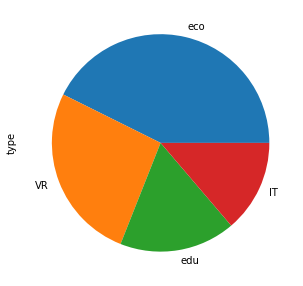

In [53]:
circle_df(train1_df)

## ----------------------------------------------------------

In [54]:
result(train2_words)

'VR'

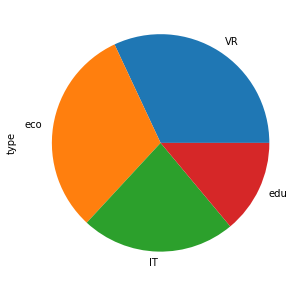

In [55]:
circle_df(train2_df)

## ----------------------------------------------------------

In [56]:
result(train3_words)

'VR'

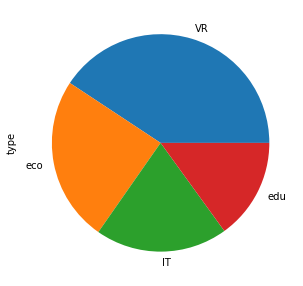

In [57]:
circle_df(train3_df)

## ----------------------------------------------------------

In [58]:
result(train4_words)

'VR'

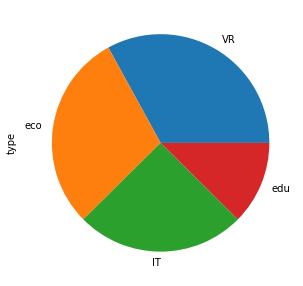

In [59]:
circle_df(train4_df)


## ----------------------------------------------------------

In [60]:
result(train5_words)

'eco'

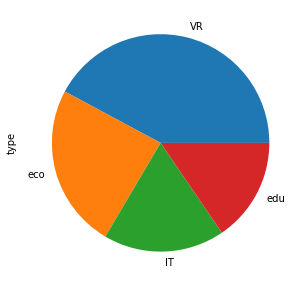

In [61]:
circle_df(train5_df)

## ----------------------------------------------------------

In [62]:
result(train6_words)

'eco'

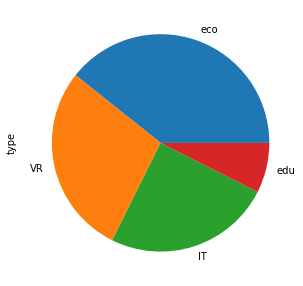

In [63]:
circle_df(train6_df)

In [64]:
# cv2.imshow("img", img)
# cv2.waitKey(0)